In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

In [8]:
data = load_iris()
X = data.data
y = data.target

In [9]:
y_encoded = to_categorical(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential([
    Dense(10, activation="relu", input_shape=(4,)),
    Dense(8, activation="relu"),
    Dense(3, activation="softmax")
])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer = "adam",
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2361 - loss: 1.3446 - val_accuracy: 0.3333 - val_loss: 1.1163
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1802 - loss: 1.2751 - val_accuracy: 0.3333 - val_loss: 1.0654
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1970 - loss: 1.1823 - val_accuracy: 0.3333 - val_loss: 1.0195
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1946 - loss: 1.1523 - val_accuracy: 0.4167 - val_loss: 0.9768
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3152 - loss: 1.0599 - val_accuracy: 0.4167 - val_loss: 0.9376
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4845 - loss: 0.9509 - val_accuracy: 0.5000 - val_loss: 0.8991
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4757 - loss: 0.9732 - val_accuracy: 0.5000 - val_loss: 0.8634
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5993 - loss: 0.8825 - val_accuracy: 0.5000 - 

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0556
Test Accuracy: 1.00


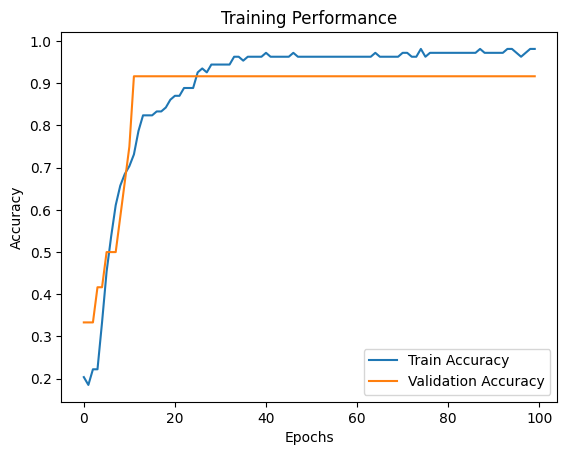

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Performance')
plt.show()